In [36]:
import pandas, xarray, os
import numpy as np
from matplotlib import pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
#import geodatasets
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles

%matplotlib inline

In [3]:
indir = '/Users/scollis/data/Kestrel/'
all_files = os.listdir(indir)
csvfiles = []
for fl in all_files:
    if 'csv' in fl and 'Jul' in fl:
        csvfiles.append(fl)

csvfiles.sort()

In [4]:
csvfiles

['ENVIRO_-_2798244_Jul_22_2024_10_10_54_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_08_34_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_20_39_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_31_00_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_11_38_40_AM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_12_56_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_11_29_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_22_40_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_30_10_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_39_49_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_1_45_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_22_51_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_36_45_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_4_50_05_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_5_07_05_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_5_49_19_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_27_39_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_41_14_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_6_54_50_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_7_06_40_PM.csv',
 'ENVIRO_-_2798244_Jul_22_2024_7_1

In [15]:
data = pandas.read_csv(os.path.join(indir, csvfiles[0]), header=3)
units = data.iloc[0]
data_formatted = data[1:]
if units['Temperature'] == '°F':
    data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
else:
    data_formatted.Temperature = data_formatted.Temperature.astype(float)
    

data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
data_formatted['Wind Speed'] = data_formatted['Wind Speed'].astype(float)
data_formatted['time'] = pandas.to_datetime(data_formatted['FORMATTED DATE_TIME'])
data_formatted = data_formatted.set_index('time')
google_urls = data[1:]['Location coordinates'].values
lat = [url.split('=')[-1].split(',')[0] for url in google_urls]
lon = [url.split('=')[-1].split(',')[1] for url in google_urls]
data_formatted.insert(0, 'Latitude', np.array(lat))
data_formatted.insert(0, 'Longitude', np.array(lon))

/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/2029182849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/2029182849.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/2029182849.py:11: SettingWithCopyWar

In [29]:
def read_kest(fname, indir):
    try:
        data = pandas.read_csv(os.path.join(indir, fname), header=3)
        units = data.iloc[0]
        data_formatted = data[1:]
        if units['Temperature'] == '°F':
            data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
        else:
            data_formatted.Temperature = data_formatted.Temperature.astype(float)
            
        
        data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
        data_formatted['Wind Speed'] = data_formatted['Wind Speed'].astype(float)
        data_formatted['time'] = pandas.to_datetime(data_formatted['FORMATTED DATE_TIME'])
        data_formatted = data_formatted.set_index('time')
        google_urls = data[1:]['Location coordinates'].values
        lat = [np.float(url.split('=')[-1].split(',')[0]) for url in google_urls]
        lon = [np.float(url.split('=')[-1].split(',')[1]) for url in google_urls]
        data_formatted.insert(0, 'Latitude', np.array(lat))
        data_formatted.insert(0, 'Longitude', np.array(lon))
    except AttributeError:
        print('no geo data')
        data_formatted = 'ERROR'
    return data_formatted

In [30]:
goods = []
bads = []
for fl in csvfiles:
    this = read_kest(fl, indir)
    if type(this) is str:
        bads.append(this)
    else:
        goods.append(this)


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:13: SettingWithCopyWarnin

no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:13: SettingWithCopyWarnin

no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data


/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted.Temperature = (data_formatted.Temperature.astype(float)- 32.0)/1.8
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_formatted['Dew Point'] = data_formatted['Dew Point'].astype(float)
/var/folders/f4/f3jp1t2x0hddhf4vz50gzlnc0000gn/T/ipykernel_32211/650650433.py:13: SettingWithCopyWarnin

no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data
no geo data


ValueError: could not convert string to float: '2024-07-23 03:51:19 PM 3:51:19 PM'

In [31]:
len(goods)

60

In [32]:
len(bads)

44

In [33]:
uber = pandas.concat(goods)

<AxesSubplot: xlabel='time'>

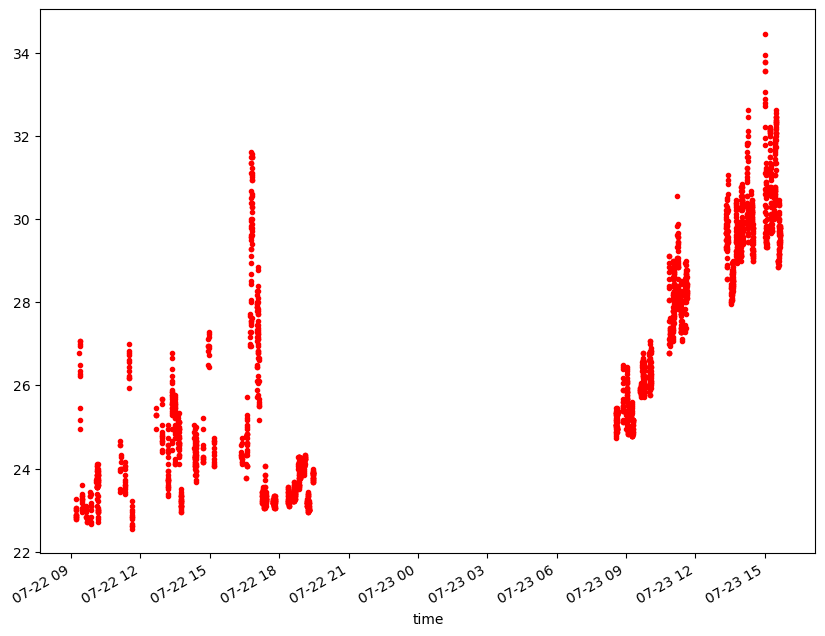

In [34]:
#time1 = pandas.Timestamp("2024-05-10 09:00:00")
#time2 = pandas.Timestamp("2024-05-10 12:00:00")


fm = plt.figure(figsize=[10,8])
#data['Dew Point'].plot(color='blue', label='Dewpoint(F)')
uber['Temperature'].plot(color='red', label='Temperature(F)',marker='.', linestyle='none')


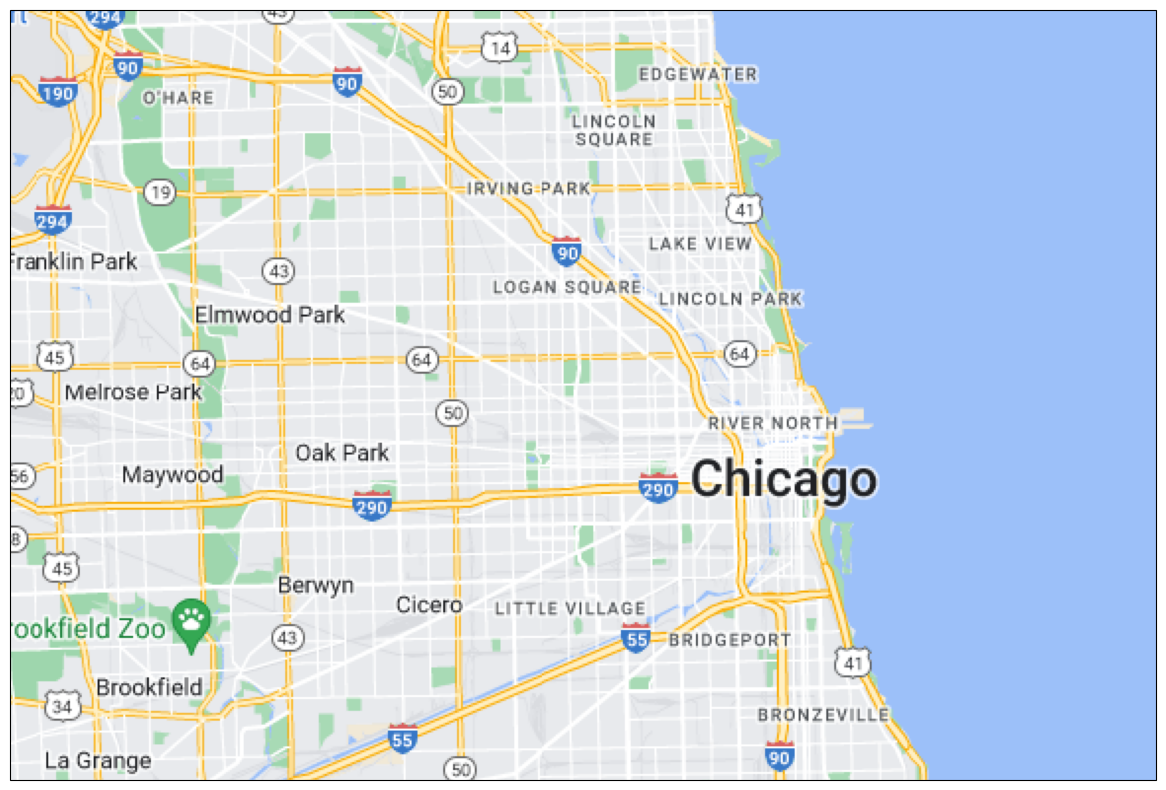

In [60]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="street")
mercator = tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=mercator)
ax.add_image(tiler, 11)
# Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values)
ax.set_extent((-87.9, -87.5, 41.8, 42.0))


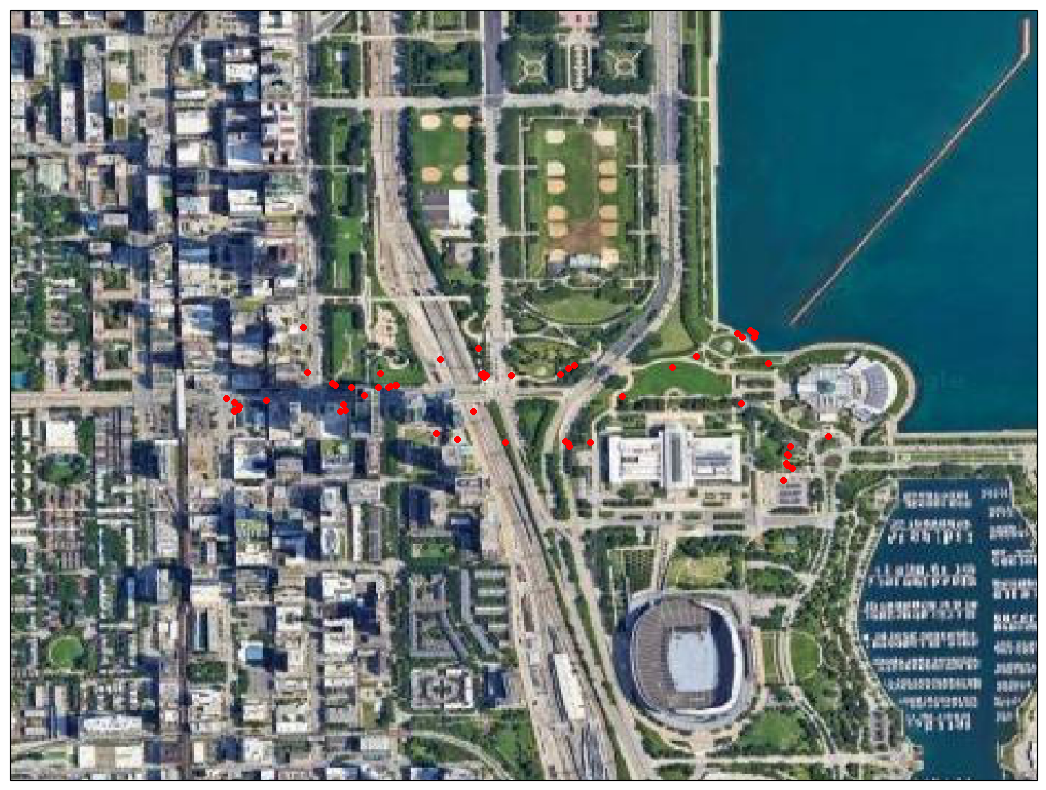

In [79]:
fig = plt.figure(figsize=(20, 10))
tiler = GoogleTiles(style="satellite")
pca = ccrs.PlateCarree() #tiler.crs
#add_metpy_logo(fig, 1100, 300, size='large')
ax = fig.add_subplot(1, 1, 1, projection=pca)
ax.add_image(tiler, 15)
# Add coastlines and gridlines for reference

# Plot the points on the map
ax.scatter(uber['Longitude'].values, uber['Latitude'].values,color='red', s=10)
ax.set_extent((-87.63, -87.61, 41.86, 41.875))


In [59]:
uber['Latitude'].values

array([41.8660824, 41.8660824, 41.8660824, ..., 41.867684 , 41.867684 ,
       41.867684 ])

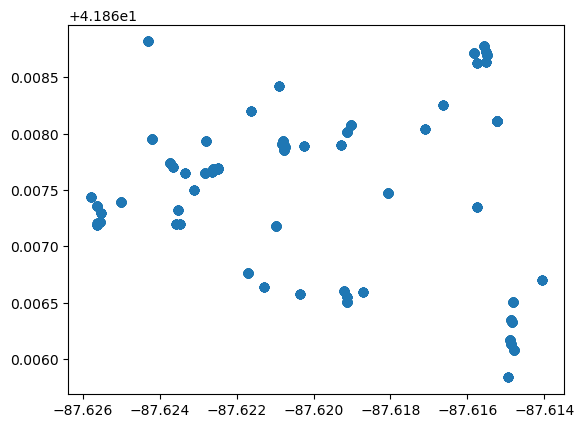

In [43]:
plt.scatter(uber['Longitude'], uber['Latitude'])

In [27]:
uber['Longitude'].plot()

TypeError: no numeric data to plot

In [28]:
uber['Longitude']

time
2024-07-22 10:05:44    -87.6147743
2024-07-22 10:05:49    -87.6147743
2024-07-22 10:05:54    -87.6147743
2024-07-22 10:05:59    -87.6147743
2024-07-22 10:06:04    -87.6147743
                          ...     
2024-07-23 15:40:09    -87.6226057
2024-07-23 15:40:14    -87.6226057
2024-07-23 15:40:23    -87.6226057
2024-07-23 15:40:27    -87.6226057
2024-07-23 15:40:30    -87.6226057
Name: Longitude, Length: 2235, dtype: object